# Orlando - Clissifica√ß√£o Bin√°ria - Brest Cancer - Classificar um registro

- Base de dados: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

c:\Users\CLIENTE\anaconda3\envs\orlando\lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


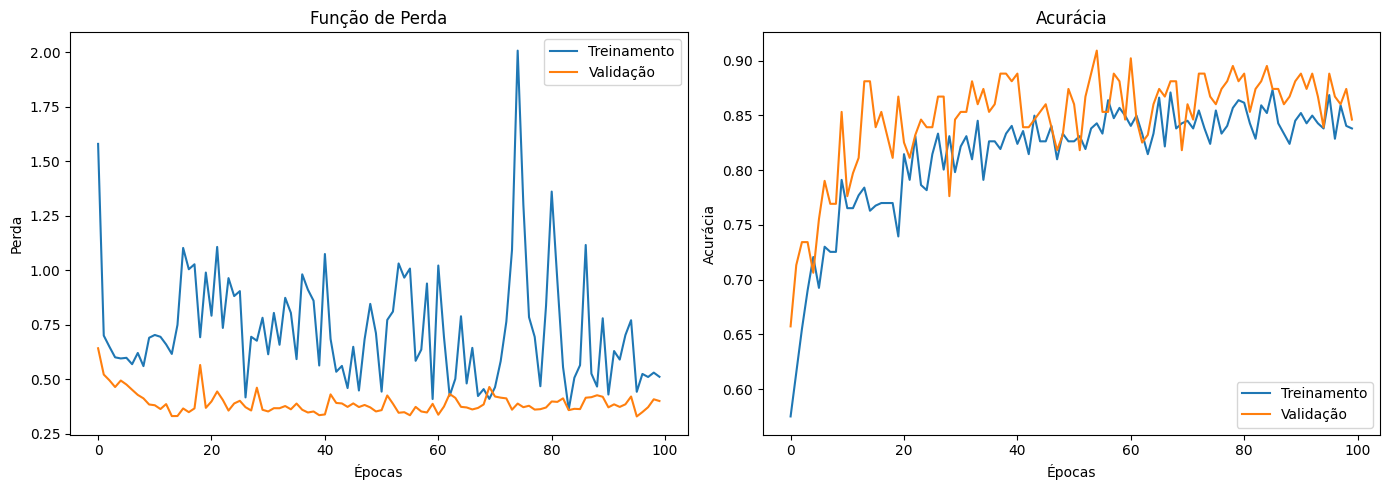

5/5 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 14ms/step

 Acur√°cia final no teste: 0.8462


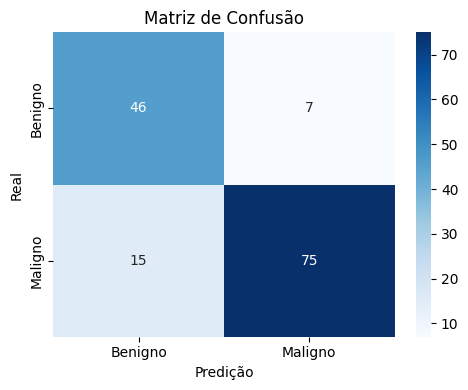


üìã Relat√≥rio de Classifica√ß√£o:
              precision    recall  f1-score   support

     Benigno       0.75      0.87      0.81        53
     Maligno       0.91      0.83      0.87        90

    accuracy                           0.85       143
   macro avg       0.83      0.85      0.84       143
weighted avg       0.86      0.85      0.85       143

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 101ms/step

 Resultado para novo paciente:
üî¥ Maligno (probabilidade: 100.00%)


C:\Users\CLIENTE\AppData\Local\Temp\ipykernel_15220\2353646178.py:120: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("üî¥ Maligno (probabilidade: {:.2f}%)".format(float(previsao_novo)*100))


In [3]:
# ---------------------------
# 1. Bibliotecas necess√°rias
# ---------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer, Dropout
from tensorflow.keras.optimizers import Adam

# ---------------------------
# 2. Carregamento dos dados
# ---------------------------
X = pd.read_csv(r'C:\Users\CLIENTE\OneDrive\PROJETOS\PROJETO_DEEP_LEARNING\Parte 1 - Redes Neurais Artificiais\classifica√ß√£o bin√°ria\entradas_breast.csv')
y = pd.read_csv(r'C:\Users\CLIENTE\OneDrive\PROJETOS\PROJETO_DEEP_LEARNING\Parte 1 - Redes Neurais Artificiais\classifica√ß√£o bin√°ria\saidas_breast.csv')

# ---------------------------
# 3. Divis√£o treino e teste
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# ---------------------------
# 4. Constru√ß√£o da rede neural
# ---------------------------
modelo = Sequential()
modelo.add(InputLayer(input_shape=(X.shape[1],)))
modelo.add(Dense(16, activation='relu', kernel_initializer='random_uniform'))
modelo.add(Dropout(0.2))
modelo.add(Dense(16, activation='relu', kernel_initializer='random_uniform'))
modelo.add(Dropout(0.2))
modelo.add(Dense(1, activation='sigmoid'))

# Compila√ß√£o do modelo
modelo.compile(optimizer=Adam(learning_rate=0.001, clipvalue=0.5),
               loss='binary_crossentropy',
               metrics=['binary_accuracy'])

# ---------------------------
# 5. Treinamento do modelo
# ---------------------------
historico = modelo.fit(X_train, y_train,
                       validation_data=(X_test, y_test),
                       epochs=100,
                       batch_size=10,
                       verbose=0)

# ---------------------------
# 6. Visualiza√ß√£o: Gr√°ficos
# ---------------------------
plt.figure(figsize=(14, 5))

# Gr√°fico da perda (loss)
plt.subplot(1, 2, 1)
plt.plot(historico.history['loss'], label='Treinamento')
plt.plot(historico.history['val_loss'], label='Valida√ß√£o')
plt.title('Fun√ß√£o de Perda')
plt.xlabel('√âpocas')
plt.ylabel('Perda')
plt.legend()

# Gr√°fico da acur√°cia
plt.subplot(1, 2, 2)
plt.plot(historico.history['binary_accuracy'], label='Treinamento')
plt.plot(historico.history['val_binary_accuracy'], label='Valida√ß√£o')
plt.title('Acur√°cia')
plt.xlabel('√âpocas')
plt.ylabel('Acur√°cia')
plt.legend()

plt.tight_layout()
plt.show()

# ---------------------------
# 7. Avalia√ß√£o no conjunto de teste
# ---------------------------
previsoes = modelo.predict(X_test)
previsoes_binarias = (previsoes > 0.5)

# Acur√°cia
acc = accuracy_score(y_test, previsoes_binarias)
print(f"\n Acur√°cia final no teste: {acc:.4f}")

# ---------------------------
# 8. Matriz de Confus√£o
# ---------------------------
cm = confusion_matrix(y_test, previsoes_binarias)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benigno', 'Maligno'],
            yticklabels=['Benigno', 'Maligno'])
plt.title('Matriz de Confus√£o')
plt.xlabel('Predi√ß√£o')
plt.ylabel('Real')
plt.tight_layout()
plt.show()

# ---------------------------
# 9. Relat√≥rio de Classifica√ß√£o
# ---------------------------
print("\nüìã Relat√≥rio de Classifica√ß√£o:")
print(classification_report(y_test, previsoes_binarias, target_names=['Benigno', 'Maligno']))

# ---------------------------
# 10. Previs√£o de novo paciente
# ---------------------------
novo = np.array([[15.80, 8.34, 118, 900, 0.10, 0.26, 0.08, 0.134, 0.178, 0.20,
                  0.05, 1098, 0.87, 4500, 145.2, 0.005, 0.04, 0.05, 0.015, 0.03,
                  0.007, 23.15, 16.64, 178.5, 2018, 0.14, 0.185, 0.84, 158, 0.363]])

previsao_novo = modelo.predict(novo)

print("\n Resultado para novo paciente:")
if previsao_novo > 0.5:
    print("üî¥ Maligno (probabilidade: {:.2f}%)".format(float(previsao_novo)*100))
else:
    print("üü¢ Benigno (probabilidade: {:.2f}%)".format((1 - float(previsao_novo))*100))


### Considera√ß√µes:

Os resultados obtidos com a aplica√ß√£o da rede neural para a classifica√ß√£o bin√°ria de n√≥dulos mam√°rios demonstram um desempenho satisfat√≥rio, com acur√°cia final de aproximadamente 84,62% no conjunto de teste. Tal valor indica que o modelo √© capaz de realizar a tarefa com um bom grau de confiabilidade, considerando o equil√≠brio entre sensibilidade e especificidade. No entanto, uma an√°lise mais detalhada das m√©tricas individuais e da matriz de confus√£o revela nuances importantes sobre o comportamento do classificador.

A matriz de confus√£o mostra que, dos 53 casos benignos presentes no conjunto de teste, 46 foram corretamente classificados como benignos, enquanto 7 foram incorretamente rotulados como malignos (falsos positivos). Por outro lado, dos 90 casos malignos, 75 foram identificados corretamente, enquanto 15 foram erroneamente classificados como benignos (falsos negativos). Este √∫ltimo tipo de erro √© particularmente relevante no contexto cl√≠nico, pois representa a falha em detectar a presen√ßa de uma condi√ß√£o grave, podendo comprometer o tratamento precoce. Portanto, embora o modelo apresente bons resultados gerais, a taxa de falsos negativos ainda demanda aten√ß√£o, especialmente em aplica√ß√µes sens√≠veis √† sa√∫de humana.

No relat√≥rio de classifica√ß√£o, observa-se que a classe ‚Äúmaligno‚Äù apresenta uma precis√£o de 0,91, indicando que a maioria das predi√ß√µes de malignidade estavam corretas. No entanto, o recall para essa mesma classe foi de 0,83, evidenciando que 17% dos casos malignos n√£o foram detectados. Em contrapartida, a classe ‚Äúbenigno‚Äù apresentou precis√£o de 0,75 e recall de 0,87, revelando que o modelo tende a classificar corretamente a maioria dos casos benignos, ainda que com maior propens√£o a gerar falsos positivos. O F1-score ponderado, que considera o suporte de cada classe, foi de 0,85, confirmando um bom equil√≠brio geral entre precis√£o e recall.

Diante disso, o desempenho apresentado pode ser considerado bastante robusto para uma primeira abordagem, especialmente em tarefas de classifica√ß√£o m√©dica. Ainda assim, h√° espa√ßo para melhorias. Estrat√©gias como ajuste do limiar de decis√£o da fun√ß√£o sigmoide, repondera√ß√£o das classes no processo de treinamento (via class weights), ou t√©cnicas de balanceamento do conjunto de dados, como o uso de oversampling (ex. SMOTE), podem ser empregadas com o objetivo de reduzir a taxa de falsos negativos e melhorar a sensibilidade do modelo. Al√©m disso, a ado√ß√£o de valida√ß√£o cruzada com m√∫ltiplos folds poderia tornar a avalia√ß√£o mais confi√°vel e representativa. Essas medidas s√£o especialmente importantes em cen√°rios m√©dicos, nos quais a precis√£o diagn√≥stica est√° diretamente associada √† qualidade de vida dos pacientes.
